# Project: Multi-Layer Perceptron for Handwritten Digit Recognition using MNIST


## Introduction
In this notebook, aim of this project is to build an MLP for handwritten digit classification using the MNIST dataset. We will use the PyTorch framework to build and train the MLP model. In a separate notebook, we will also implement the LeNet architecture and compare its performance agains the MLP's both in their accuracy and robustness, as well as their translation invariance properties.

We will begin by importing the necessary packages and frameworks.

## Import Libraries and Packages

In [1]:
import numpy as np           
import matplotlib.pyplot as plt    
import pandas as pd
import torch          
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision.transforms as transforms

## Import Dataset and Preprocessing

In [2]:
# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Download and load the training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test dataset
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

dataiter = iter(trainloader)
images, labels = next(dataiter)
images_np = images.numpy()
labels_np = labels.numpy()

print(f'Batch shape: {images_np.shape}')  
print(f'Batch label shape: {labels_np.shape}')  

Batch shape: (64, 1, 28, 28)
Batch label shape: (64,)


## Explanatory Data Analysis (EDA)

In [3]:
# Print the shape of the entire training set
print(f'Training data shape: {trainset.data.numpy().shape}')
print(f'Training labels shape: {trainset.targets.numpy().shape}')

# Print the shape of the entire test set
print(f'Test data shape: {testset.data.numpy().shape}')
print(f'Test labels shape: {testset.targets.numpy().shape}')

Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


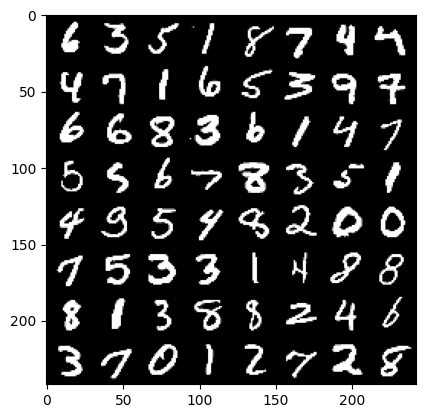

tensor([[6, 3, 5, 1, 8, 7, 4, 4],
        [4, 7, 1, 6, 5, 3, 9, 7],
        [6, 6, 8, 3, 6, 1, 4, 7],
        [5, 5, 6, 7, 8, 3, 5, 1],
        [4, 9, 5, 4, 8, 2, 0, 0],
        [7, 5, 3, 3, 1, 4, 8, 8],
        [8, 1, 3, 8, 8, 2, 4, 6],
        [3, 7, 0, 1, 2, 7, 2, 8]])


In [5]:
# Function to plot a batch of images
def imshow(img):
    img = img.numpy()
    plt.imshow(np.transpose(img, (1, 2, 0)))
    plt.show()

# Show images
imshow(torchvision.utils.make_grid(images))

# Print labels
print(labels.view(8, -1))

## MLP Architecture

In [6]:
class MLP(nn.Module):

    def __init__(self):
        super(MLP, self).__init__()
        
        # Hidden layers
        self.linear1 = nn.Linear(784, 100)
        self.linear2 = nn.Linear(100, 24)
        
        # Output layer with 10 units, each for a digit
        self.linear3 = nn.Linear(24, 10)
        
        # ReLU as hidden layer activation
        self.activation = nn.ReLU()
        
    def forward(self, x):
        # Forward prop
        x = x.view(x.size(0), -1)
        x = self.linear1(x)
        x = self.activation(x)
        x = self.linear2(x)
        x = self.activation(x)
        x = self.linear3(x)
        return x

In [7]:
# Check for GPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

# Initialize model
model = MLP()
print(model)

# Move the model to the device of choice
model = model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)


Using device: cuda
MLP(
  (linear1): Linear(in_features=784, out_features=100, bias=True)
  (linear2): Linear(in_features=100, out_features=24, bias=True)
  (linear3): Linear(in_features=24, out_features=10, bias=True)
  (activation): ReLU()
)


## Model Training

In [ ]:
log = []
for epoch in range(25):
    running_loss = 0
    
    for i, data in enumerate(trainloader, 0):
        # Input the training batch
        inputs, labels = data
        
        # Move data to the preferred device
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Reset the parameter gradients
        optimizer.zero_grad()
        
        # Forward prop
        outputs = model(inputs)
        
        # Loss
        loss = criterion(outputs, labels)
        log.append(loss.item()) 
        
        # Back prop
        loss.backward()
        optimizer.step()
        
        # Accumulate running loss
        running_loss += loss.item()
        
        # Print every 250 mini-batches
        if i % 250 == 249:
            print(f'Epoch [{epoch + 1}], Batch [{i + 1}], Loss: {running_loss / 100:.4f}')
            running_loss = 0.0

print("Training Complete!")

Epoch [1], Batch [250], Loss: 1.7945
Epoch [1], Batch [500], Loss: 0.6530
Epoch [1], Batch [750], Loss: 0.5045
Epoch [2], Batch [250], Loss: 0.3357
Epoch [2], Batch [500], Loss: 0.3077
Epoch [3], Batch [250], Loss: 0.2157
Epoch [3], Batch [500], Loss: 0.2164
Epoch [3], Batch [750], Loss: 0.2115
Epoch [4], Batch [250], Loss: 0.1577
Epoch [4], Batch [500], Loss: 0.1545
Epoch [4], Batch [750], Loss: 0.1594
Epoch [5], Batch [250], Loss: 0.1235
Epoch [5], Batch [500], Loss: 0.1292
Epoch [5], Batch [750], Loss: 0.1330
Epoch [6], Batch [250], Loss: 0.1052
Epoch [6], Batch [500], Loss: 0.0958
Epoch [6], Batch [750], Loss: 0.1095
Epoch [7], Batch [250], Loss: 0.0802
Epoch [7], Batch [500], Loss: 0.0740
Epoch [7], Batch [750], Loss: 0.0894
Epoch [8], Batch [250], Loss: 0.0589
Epoch [8], Batch [500], Loss: 0.0751
Epoch [8], Batch [750], Loss: 0.0750
Epoch [9], Batch [250], Loss: 0.0590
Epoch [9], Batch [500], Loss: 0.0557
Epoch [9], Batch [750], Loss: 0.0709
Epoch [10], Batch [250], Loss: 0.0375


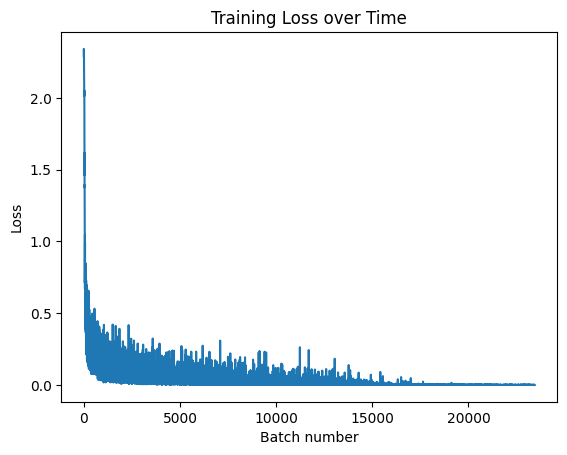

In [13]:
plt.plot(log)
plt.xlabel('Batch number')
plt.ylabel('Loss')
plt.title('Training Loss over Time')
plt.show()

## Evaluation

In [14]:
def evaluate(model, dataloader, criterion, device):
    model.eval()
    total_loss = 0.0
    correct = 0
    total = 0
    
    with torch.no_grad():
        for i, data in enumerate(dataloader, 0):
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            
            values, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    avg_loss = total_loss / len(dataloader)
    accuracy = correct / total
    return avg_loss, accuracy

# Evaluate on training data
train_loss, train_accuracy = evaluate(model, trainloader, criterion, device)
print(f'Training Accuracy: {train_accuracy:.4f}, Training Loss: {train_loss:.4f}')

# Evaluate on test data
test_loss, test_accuracy = evaluate(model, testloader, criterion, device)
print(f'Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}')


Training Accuracy: 1.0000, Training Loss: 0.0003
Test Accuracy: 0.9824, Test Loss: 0.0938


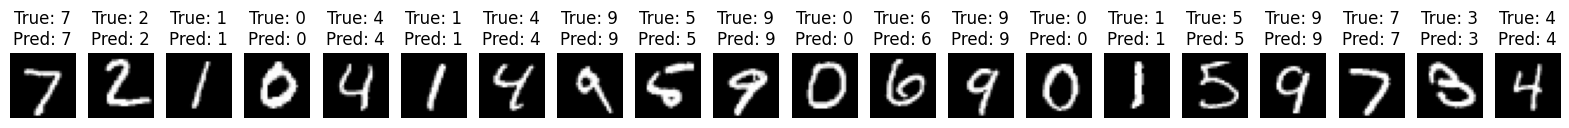

In [62]:
def visualize_predictions(model, testloader, device, num_images=20):
    model.eval()
    
    images, labels = next(iter(testloader))  # Get a batch of test images
    images, labels = images.to(device), labels.to(device)
    
    # Get predictions
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)
    
    # Move images and labels back to CPU for visualization
    images = images.cpu().numpy()
    labels = labels.cpu().numpy()
    predicted = predicted.cpu().numpy()
    
    # Visualize the images with true and predicted labels
    fig, axes = plt.subplots(1, num_images, figsize=(20, 2))
    for i in range(num_images):
        ax = axes[i]
        ax.imshow(images[i].reshape(28, 28), cmap='gray')
        ax.set_title(f'True: {labels[i]}\nPred: {predicted[i]}')
        ax.axis('off')
    plt.show()

# Visualize predictions
visualize_predictions(model, testloader, device)

## Translation Invariance

Now, we will pick an image and shift the position of the digit in it slightly such that the number remains entierly in the image. We will then feed it into our MLP and see its result. In the other notebook, we will apply this exact transformation to the same image and feed into the LeNet model and compare the results to see which model has more translation invariance.



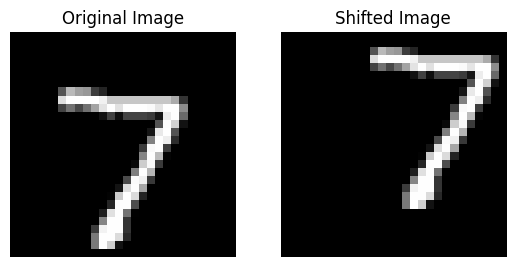

Model Predicts the Original Image as Digit 7
Model Predicts the Transformed Image as Digit 2


In [93]:
# Select some image
dataiter = iter(testloader)
images, labels = next(dataiter)
image = images[0]

# Shift the image
transformed_image = torch.roll(image, shifts=(5, -5), dims=(2, 1))

# Display the images 
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image.numpy().reshape(28, 28), cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(transformed_image.numpy().reshape(28, 28), cmap='gray')
axs[1].set_title('Shifted Image')
for ax in axs:
    ax.axis('off')
plt.show()

# Load the two images in the preferred device
image = image.to(device)
transformed_image = transformed_image.to(device)

# Predict the original image
output = model(image)
value, predicted1 = torch.max(output, 1)

# Predict the tranformed image
output = model(transformed_image)
value, predicted2 = torch.max(output, 1)

# Print the outcome
print(f"Model Predicts the Original Image as Digit {predicted1.item()}")
print(f"Model Predicts the Transformed Image as Digit {predicted2.item()}")

As we can see, after slightly shifting this digit, the MLP no longer makes the same prediction and fails to recognize the digit correctly. This shows that its translation invariance is weak. In conclusion, although we have achieved a good benchmark using the MLP, it not having much of a translation invariance makes it less desirable as the model of choice for digit recognition. In the other notebook, we will perform the same experiment on the LeNet to see how it responds.